In [2]:
import s2v
import mtg

In [3]:
cdb = mtg.CardDB()

In [4]:
# get single set
m15 = [c for c in cdb.values() if 'M15' in c.printings]

In [6]:
# get embeddings
m15_vec = s2v.model.embed_sentences(list(c.sanitized_text() for c in m15))

In [8]:
# normalize and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(m15_vec)
d2 = PCA(n_components=2).fit_transform(X)

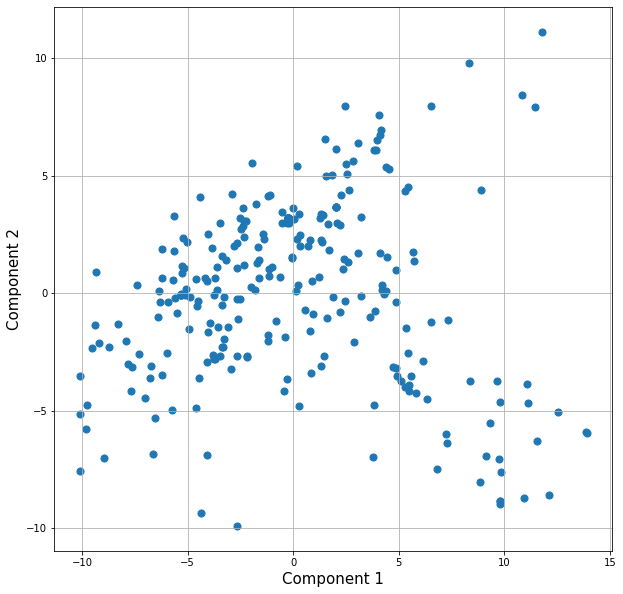

In [10]:
# plot
import matplotlib.pyplot as plt

def plot(xy, c=None):
    xyT = xy.transpose()
    data = {
        'x' : xyT[0],
        'y' : xyT[1]
    }
    if c:
        data['c'] = c

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    # ax.set_title('', fontsize = 20)
    ax.scatter(**data, s = 50)
    # ax.legend(targets)
    ax.grid()
    plt.show()
    
plot(d2)

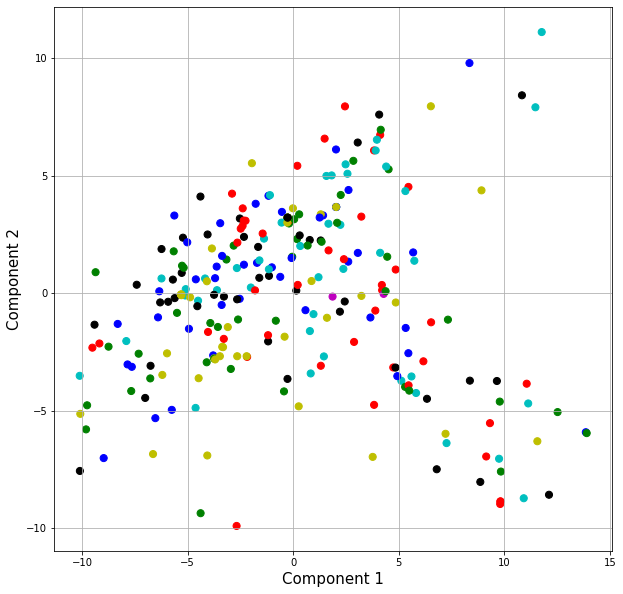

In [14]:
# Plot with colors
colormap = {
    'W': 'c',
    'U': 'b',
    'B': 'k',
    'R': 'r',
    'G': 'g'
}
def get_color(card):
    if len(card.colors) == 1:
        return colormap[card.colors[0]]
    elif len(card.colors) == 0:
        return 'y'
    else:
        return 'm'
colors = list(map(get_color, m15))

plot(d2, colors)

In [15]:
# how many dimensions SHOULD it be?
dn = PCA(0.99).fit_transform(X)
dn.shape

(269, 12)

In [16]:
dn = PCA(0.95).fit_transform(X)
dn.shape

(269, 9)

In [22]:
import numpy as np
distances = [[
    np.linalg.norm(a-b) for b in m15_vec
] for a in m15_vec]


In [24]:
n = len(m15)


3.024821